## Refereces
- __[TechVidvan](https://techvidvan.com/tutorials/python-game-project-tic-tac-toe/)__
- __[GeeksforGeeks](https://www.geeksforgeeks.org/tic-tac-toe-gui-in-python-using-pygame/)__

In [64]:
import pygame as pg
from pygame.locals import *
import time

# Global variables
XO         = 'x'
winner     = None
draw       = False
width      = 400
height     = 400
white      = (255, 255, 255)
line_color = (10,10,10)

# TicTacToe 3x3 board
TTT = [[None]*3,[None]*3,[None]*3]

# Initializing pygame window
pg.init()
fps    = 30
CLOCK  = pg.time.Clock()
screen = pg.display.set_mode((width, height+100),0,32)
pg.display.set_caption("Tic Tac Toe")

# Loading the images
opening = pg.image.load('../Python/Input/tic_tac_opening.png')
x_img   = pg.image.load('../Python/Input/x.png')
o_img   = pg.image.load('../Python/Input/o.png')

# Resizing images
x_img   = pg.transform.scale(x_img, (80,80))
o_img   = pg.transform.scale(o_img, (80,80))
opening = pg.transform.scale(opening, (width, height+100))

def game_opening():
    screen.blit(opening,(0,0))
    pg.display.update()
    time.sleep(1)
    screen.fill(white)
    
    # Drawing vertical lines
    pg.draw.line(screen,line_color,(width/3,0),  (width/3, height),7)
    pg.draw.line(screen,line_color,(width/3*2,0),(width/3*2, height),7)
    
    # Drawing horizontal lines
    pg.draw.line(screen,line_color,(0,height/3),(width, height/3),7)
    pg.draw.line(screen,line_color,(0,height/3*2),(width, height/3*2),7)
    draw_status()

def draw_status():
    global draw

    if winner is None:
        message = XO.upper() + "'s Turn"
    else:
        message = winner.upper() + " won!"
    if draw:
        message = 'Game Draw!'

    font = pg.font.Font(None, 30)
    text = font.render(message, 1, (255, 255, 255))

    # Create small window at the bottom and display text message
    screen.fill ((0, 0, 0), (0, 400, 500, 100))
    text_rect = text.get_rect(center=(width/2, height+50))
    screen.blit(text, text_rect)
    pg.display.update()

def check_win():
    global TTT, winner, draw

    # check for winning rows
    for row in range (0,3):
        if ((TTT [row][0] == TTT[row][1] == TTT[row][2]) and (TTT [row][0] is not None)):
            winner = TTT[row][0]
            pg.draw.line(screen, (250,0,0), 
                         (0,     (row + 1)*height/3 - height/6),
                         (width, (row + 1)*height/3 - height/6 ), 4)
            break

    # check for winning columns
    for col in range (0, 3):
        if (TTT[0][col] == TTT[1][col] == TTT[2][col]) and (TTT[0][col] is not None):
            winner = TTT[0][col]
            pg.draw.line (screen, (250,0,0),
                          ((col + 1)*width/3 - width/6, 0),
                          ((col + 1)*width/3 - width/6, height), 4)
            break

    # check for diagonal winners
    if (TTT[0][0] == TTT[1][1] == TTT[2][2]) and (TTT[0][0] is not None):
        winner = TTT[0][0]
        pg.draw.line (screen, (250,70,70), 
                      (50, 50), 
                      (350, 350), 4)
       

    if (TTT[0][2] == TTT[1][1] == TTT[2][0]) and (TTT[0][2] is not None):
        winner = TTT[0][2]
        pg.draw.line (screen, (250,70,70), 
                      (350, 50), 
                      (50, 350), 4)
    # check for draw
    if(all([all(row) for row in TTT]) and winner is None ):
        draw = True
    
    draw_status()

def drawXO(row,col):
    global TTT, XO

    # x-coordinates
    if row==1:
        posx = 30
    if row==2:
        posx = width/3 + 30
    if row==3:
        posx = width/3*2 + 30

    # y-coordinates
    if col==1:
        posy = 30
    if col==2:
        posy = height/3 + 30
    if col==3:
        posy = height/3*2 + 30

    # Populate boards with X or O
    TTT[row-1][col-1] = XO
    if(XO == 'x'):
        screen.blit(x_img,(posy,posx))
        XO = 'o'
    else:
        screen.blit(o_img,(posy,posx))
        XO = 'x'
    pg.display.update()

def userClick():
    # Mouse click's coordinates
    x,y = pg.mouse.get_pos()

    # Mouse click's columns (1-3)
    if(x<width/3):
        col = 1
    elif (x<width/3*2):
        col = 2
    elif(x<width):
        col = 3
    else:
        col = None
        
    # Mouse click's rows (1-3)
    if(y<height/3):
        row = 1
    elif (y<height/3*2):
        row = 2
    elif(y<height):
        row = 3
    else:
        row = None    

    if(row and col and TTT[row-1][col-1] is None):
        global XO
        
        # Draw the x or o on screen
        drawXO(row,col)
        check_win()

def reset_game():
    global TTT, winner, XO, draw
    
    time.sleep(2)
    XO     = 'x'
    draw   = False
    
    game_opening()
    winner = None
    TTT    = [[None]*3,[None]*3,[None]*3]
    
game_opening()

# Game loop
running = True
while running:
    for event in pg.event.get():
        if event.type == QUIT:
            running = False 
        elif event.type == MOUSEBUTTONDOWN:
            userClick()
            if(winner or draw):
                reset_game()
            
    pg.display.update()
    CLOCK.tick(fps)

pg.display.quit()

## Output
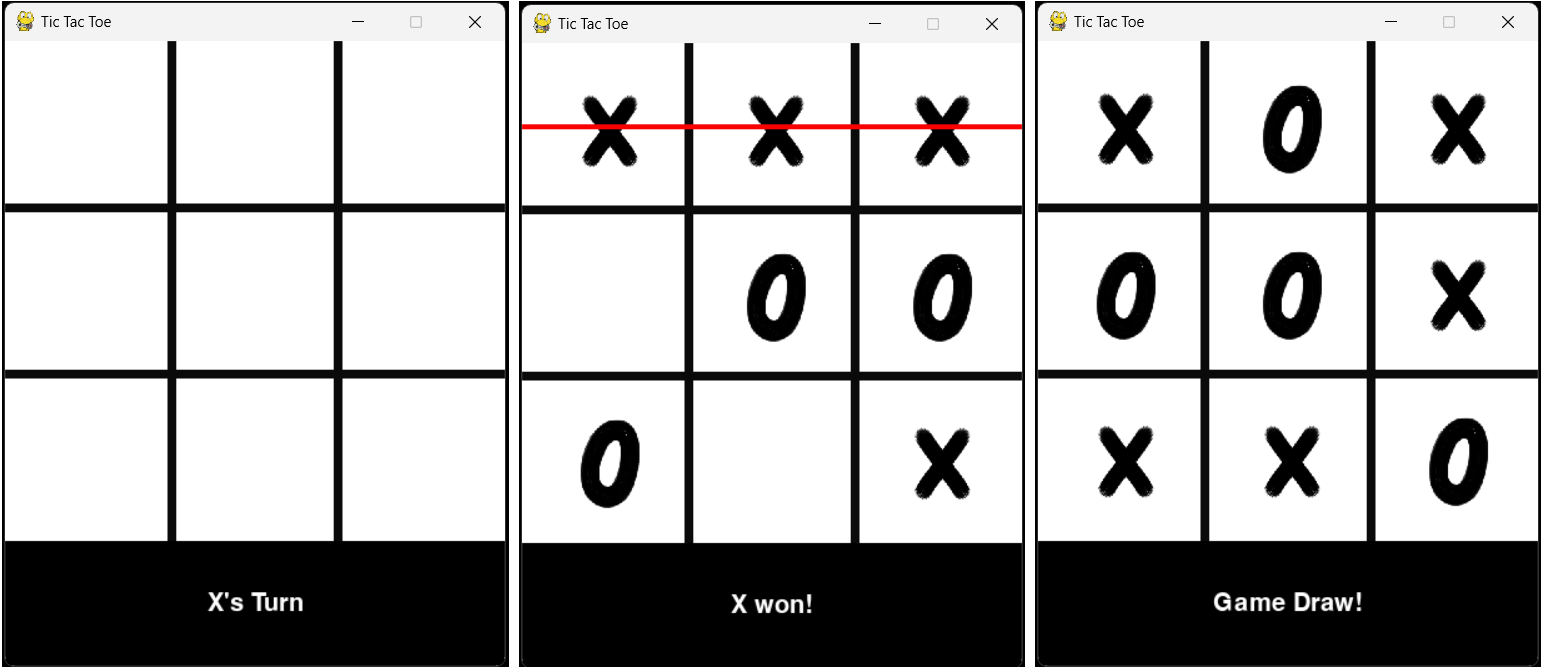

In [37]:
# purpose: to check if row and col has value, and respective TTT is empty
# if(row and col and TTT[row-1][col-1] is None):

row = [1, None, None]
col = [1, None, 1]

for i in range(len(row)):
    if(row[i] and col[i]):
        print('Clicked')
    else:
        print('Not Clicked')

Clicked
Not Clicked
Not Clicked


In [55]:
# purpose: to check if all the rows are filled, and no "winner" yet
# if(all([all(row) for row in TTT]) and winner is None ):

TTT = [['x','o','x'],[None,'x','x'],['o','o','o']]
print(TTT, '\n')

for row in TTT:
    print(all(row))

print([all(row) for row in TTT])
print([any(row) for row in TTT], '\n')

print(all([all(row) for row in TTT]))
print(any([all(row) for row in TTT]))

[['x', 'o', 'x'], [None, 'x', 'x'], ['o', 'o', 'o']] 

True
False
True
[True, False, True]
[True, True, True] 

False
True
